<a href="https://colab.research.google.com/github/ligiagvs/Notebook-de-Estudos/blob/main/Analisando_os_Dados_do_Airbnb_LISBOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-12-08/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* ...
* ... 
* ...

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,32,2021-11-01,0.36,1,315,6,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,50,2,127,2021-11-27,1.37,1,325,14,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,60,5,337,2021-12-03,2.53,1,190,13,23535/AL
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,60,2,299,2021-12-03,2.57,1,302,40,28737/AL
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,957,2,64,2021-11-14,0.48,2,248,9,55695/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:{}".format(df.shape[0]))
print("Variavéis:{}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
df.head(5)


Entradas:18527
Variavéis:18


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,32,2021-11-01,0.36,1,315,6,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,50,2,127,2021-11-27,1.37,1,325,14,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,60,5,337,2021-12-03,2.53,1,190,13,23535/AL
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,60,2,299,2021-12-03,2.57,1,302,40,28737/AL
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,957,2,64,2021-11-14,0.48,2,248,9,55695/AL


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
from numpy.ma.core import sort
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df_clean=df.isnull().sum() / df.shape[0]
df_clean.sort_values(axis=0,ascending=False)


reviews_per_month                 0.135262
last_review                       0.135262
license                           0.097102
host_name                         0.001241
name                              0.000432
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

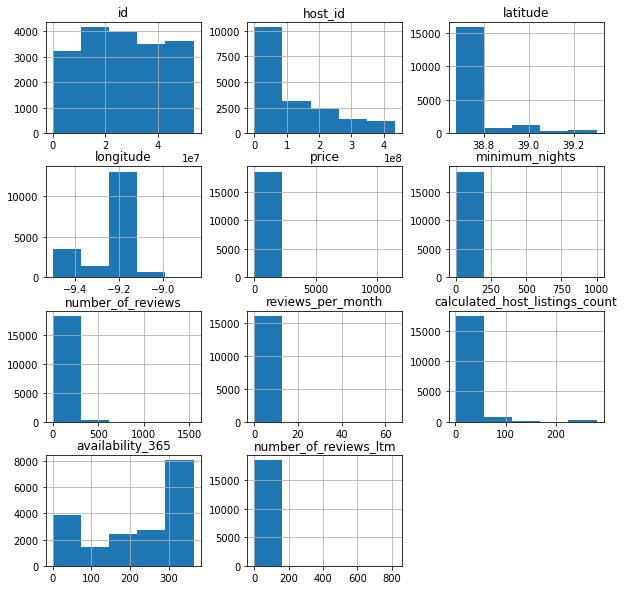

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=5,figsize=(10,10));


### **Q4. Qual a média dos preços de aluguel?**

In [7]:
# ver a média da coluna `price``
df['price'].mean()

98.33685971824904

### **Q4. Qual a correlação existente entre as variáveis**

In [15]:

# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.008414,-0.067454,-0.067510,-0.006227,0.017714
minimum_nights,-0.008414,1.000000,-0.031889,-0.046942,-0.028016,-0.021716
number_of_reviews,-0.067454,-0.031889,1.000000,0.713697,-0.088145,0.001889
reviews_per_month,-0.067510,-0.046942,0.713697,1.000000,-0.053288,0.051706
calculated_host_listings_count,-0.006227,-0.028016,-0.088145,-0.053288,1.000000,0.060420
availability_365,0.017714,-0.021716,0.001889,0.051706,0.060420,1.000000


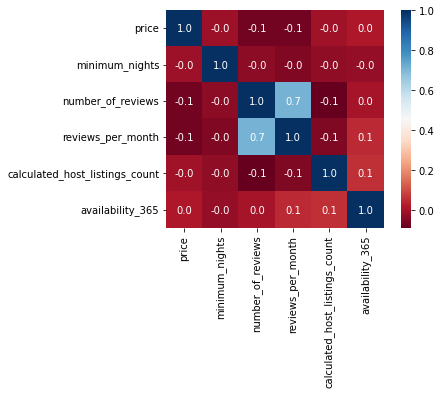

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.1f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    14050
Private room        3907
Hotel room           306
Shared room          264
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.758353
Private room       0.210881
Hotel room         0.016516
Shared room        0.014249
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [21]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Ventosa             707.000000
Alguber             610.000000
Aveiras de Baixo    450.000000
Cardosas            287.000000
Freiria             281.000000
Ota                 249.000000
Marvila             237.727273
Bucelas             236.600000
Vale do Paraso      220.000000
Santa Brbara        206.166667
Name: price, dtype: float64

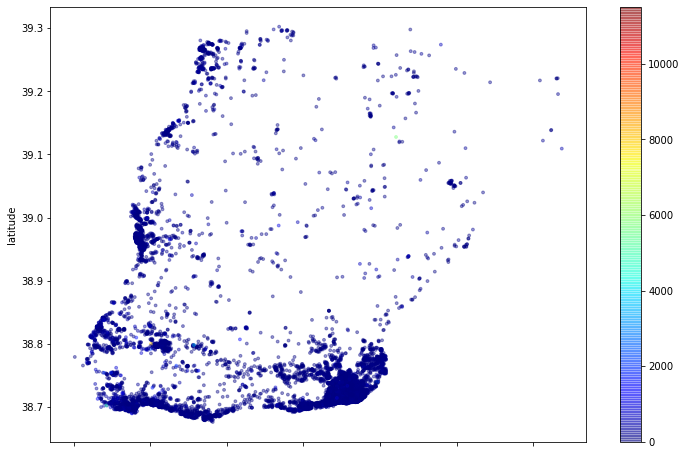

In [22]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter',x='longitude', y='latitude',alpha=0.4,c=df['price'],s=8,cmap=plt.get_cmap('jet'),figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [23]:
# ver a média da coluna `minimum_nights``
df['minimum_nights'].mean()

4.157553840341124

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.